In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
sbi=pd.read_csv("sbi.csv")
sbi

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# DATA ANALYSIS

In [3]:
sbi.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
sbi.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [5]:
sbi.shape

(1338, 8)

In [6]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [8]:
sbi.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
sbi.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

# VISUALIZATION


In [10]:
sbi.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

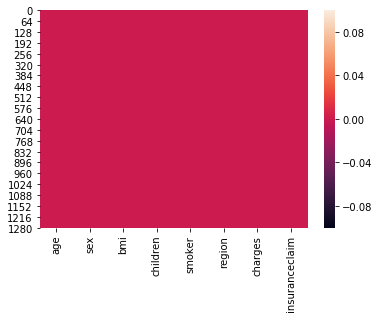

In [12]:
sns.heatmap(sbi.isnull())

In [13]:
sbi.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


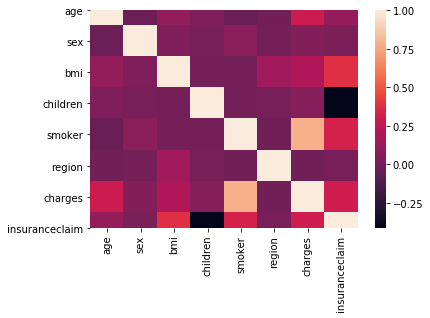

In [14]:
sns.heatmap(sbi.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E02730F88>,
      dtype=object)

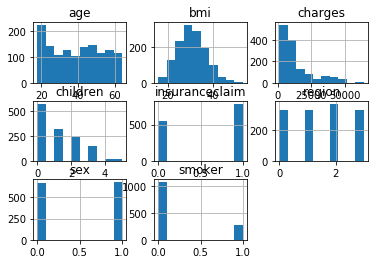

In [15]:
sbi.hist()

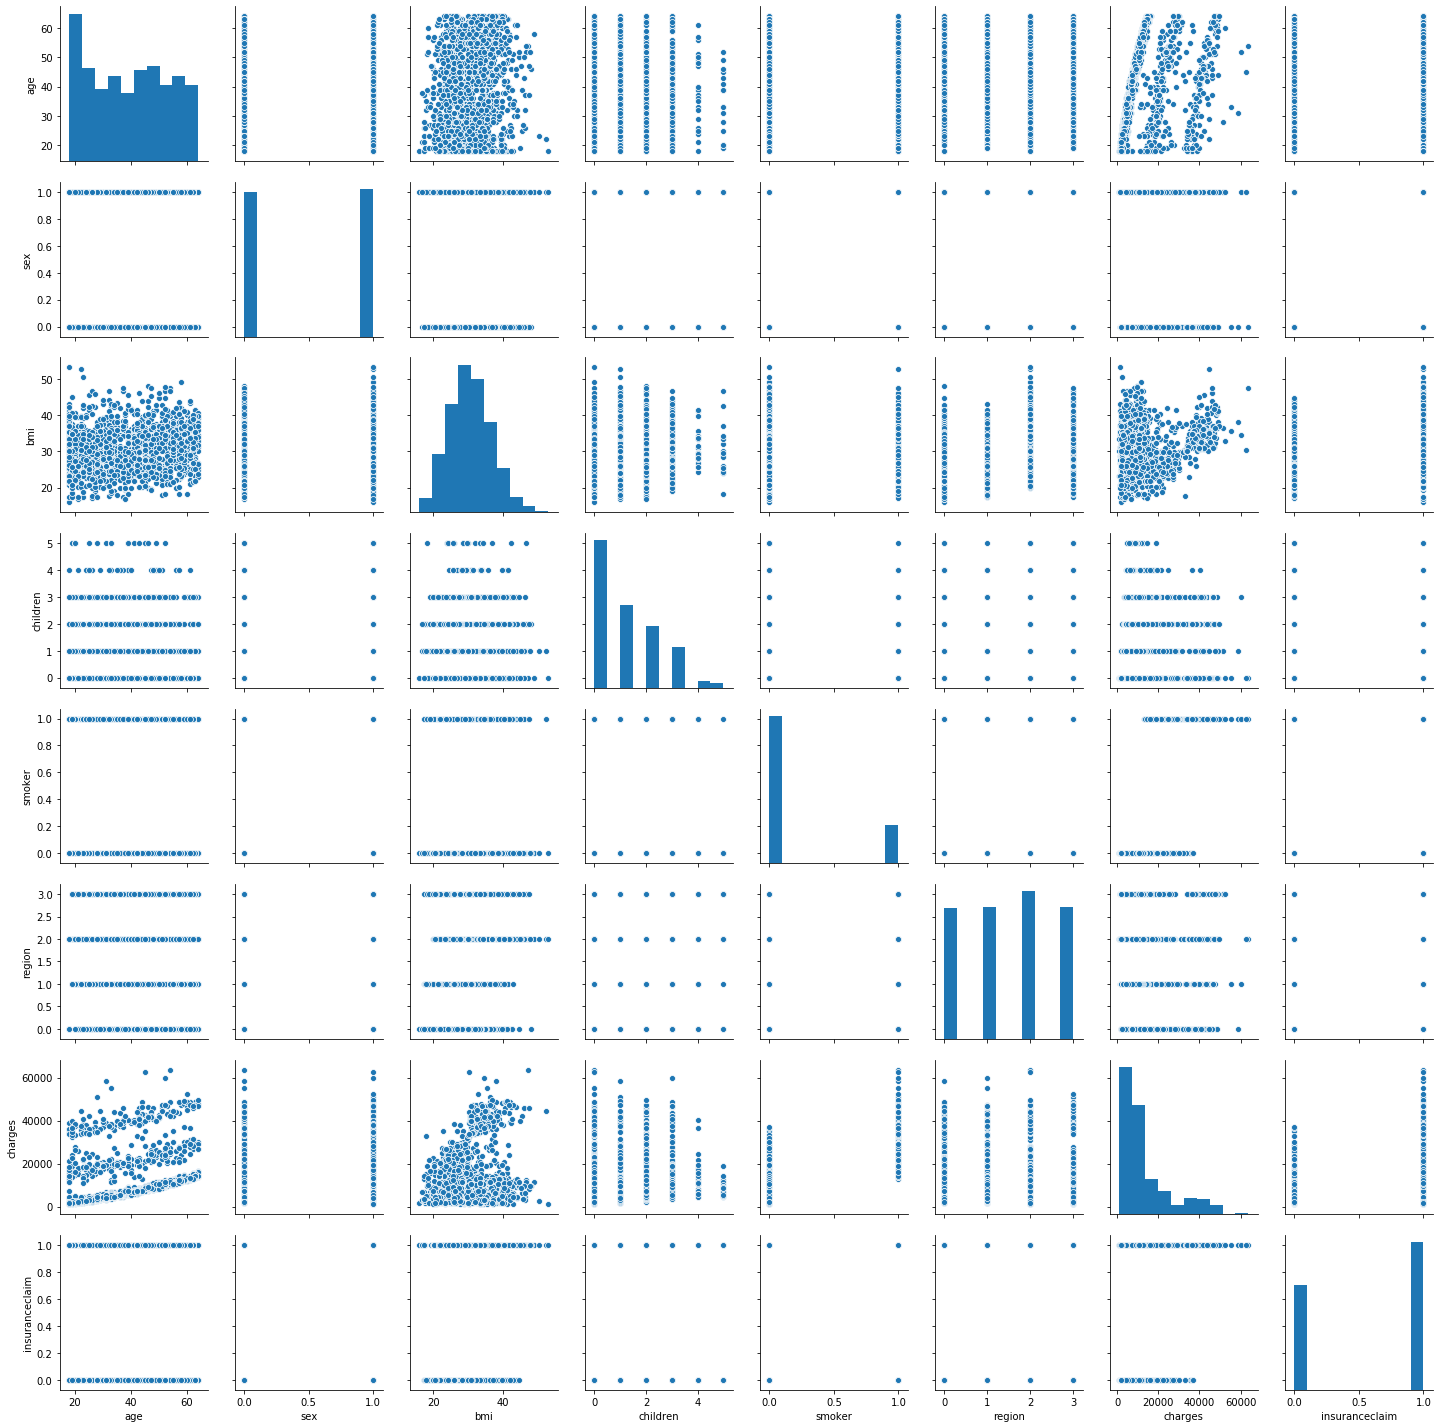

In [16]:
sns.pairplot(sbi)

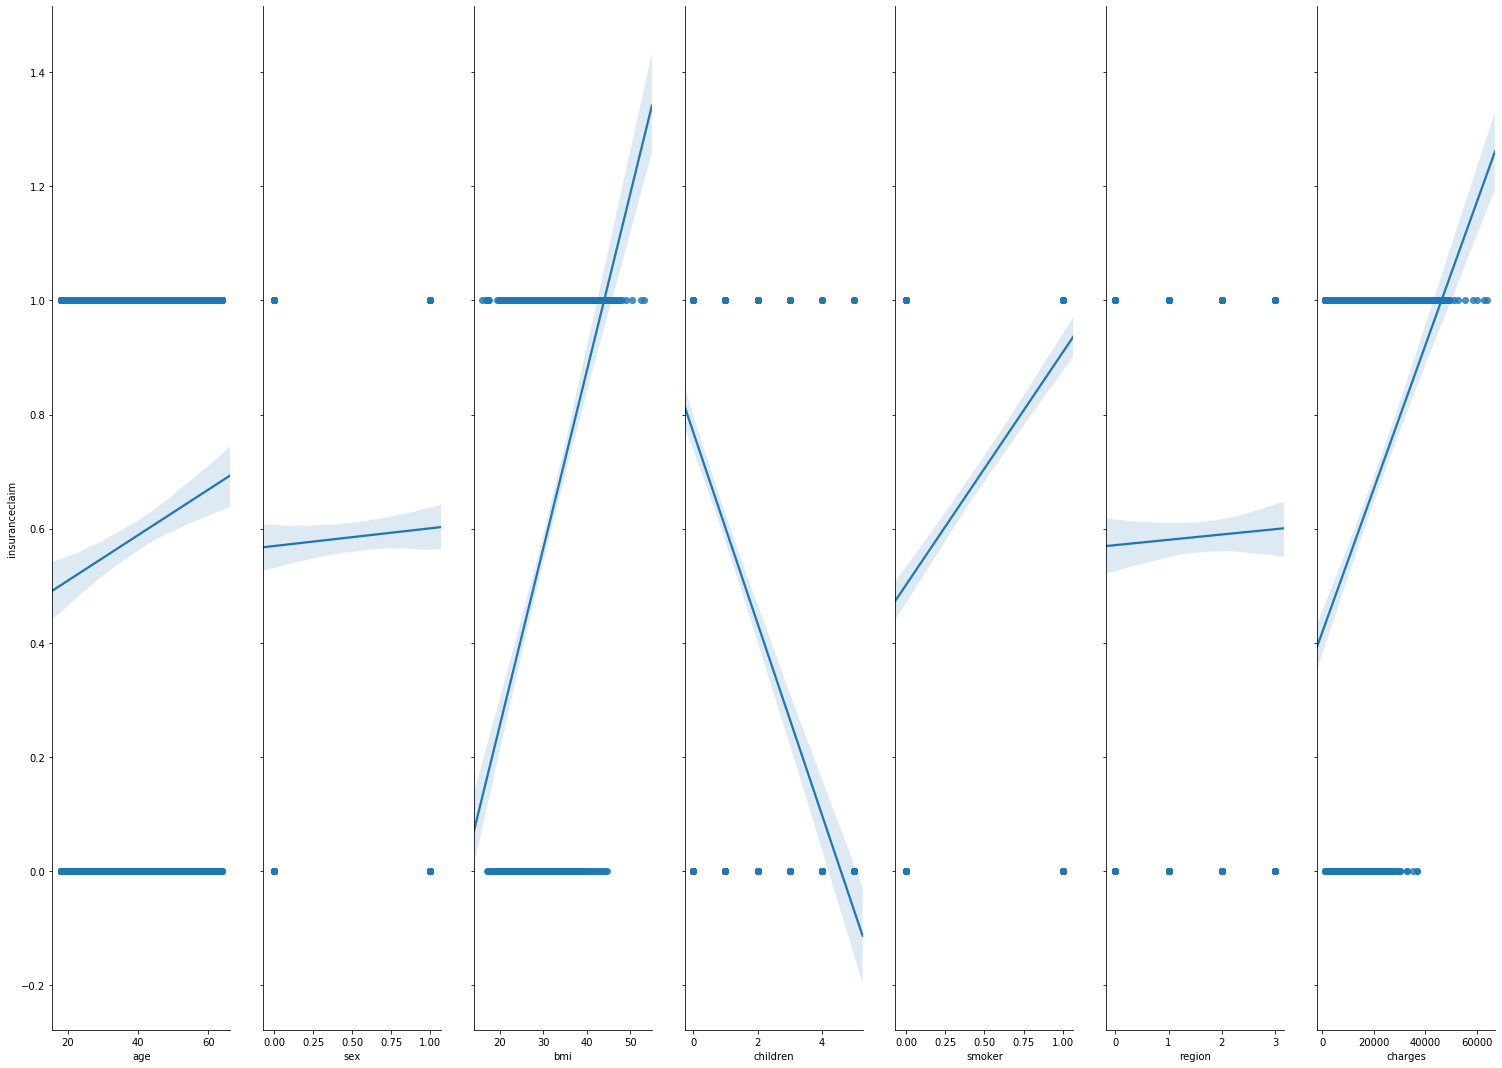

In [21]:
s=sns.pairplot(sbi,x_vars=['age','sex','bmi','children','smoker','region','charges'], y_vars="insuranceclaim",kind="reg",size=15,aspect=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E088D07C8>,
      dtype=object)

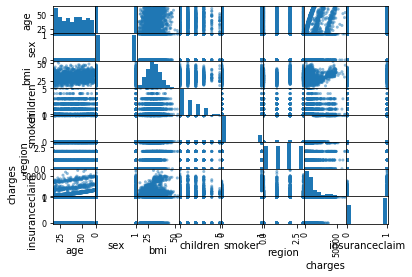

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(sbi)

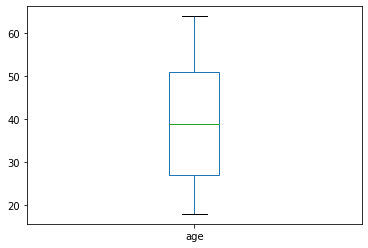

In [24]:
#Univariate plots or checking outliers
sbi['age'].plot.box()

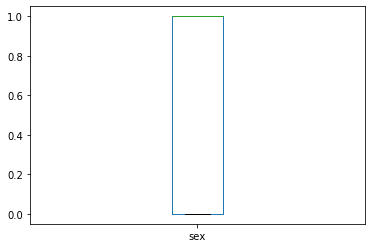

In [25]:
sbi['sex'].plot.box()

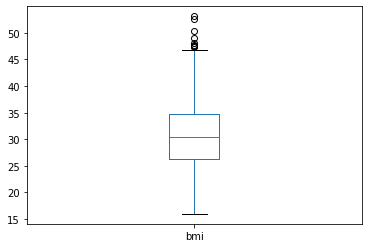

In [26]:
sbi['bmi'].plot.box()

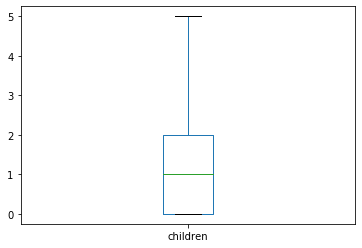

In [27]:
sbi['children'].plot.box()

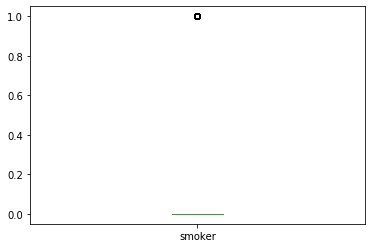

In [28]:
sbi['smoker'].plot.box()

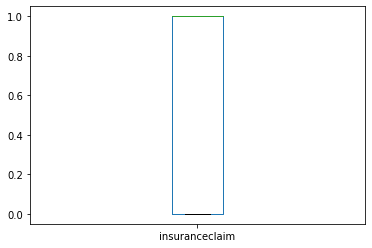

In [29]:
sbi['insuranceclaim'].plot.box()

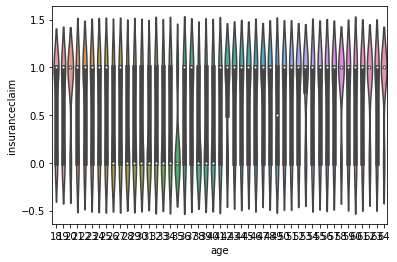

In [31]:
#Bivariate Plots
sns.violinplot(x='age',y='insuranceclaim',data=sbi)
plt.show()

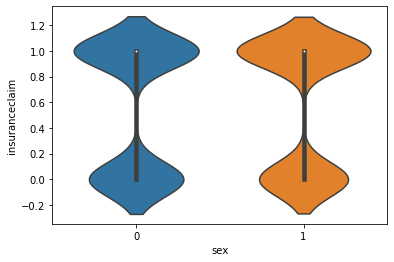

In [32]:
sns.violinplot(x='sex',y='insuranceclaim',data=sbi)
plt.show()

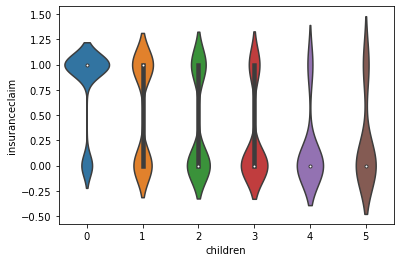

In [34]:
sns.violinplot(x='children',y='insuranceclaim',data=sbi)
plt.show()

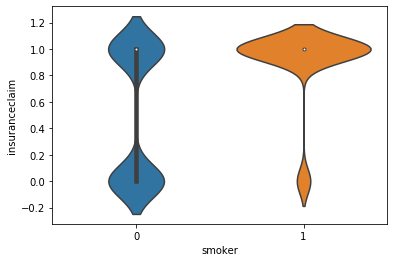

In [35]:
sns.violinplot(x='smoker',y='insuranceclaim',data=sbi)
plt.show()

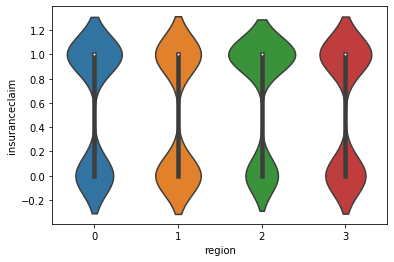

In [36]:
sns.violinplot(x='region',y='insuranceclaim',data=sbi)
plt.show()

# DATA CLEANING

In [37]:
sbi.isnull()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False


In [38]:
sbi.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [39]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(sbi))
z

array([[1.43876426, 1.0105187 , 0.45332   , ..., 1.34390459, 0.2985838 ,
        0.84190989],
       [1.50996545, 0.98959079, 0.5096211 , ..., 0.43849455, 0.95368917,
        0.84190989],
       [0.79795355, 0.98959079, 0.38330685, ..., 0.43849455, 0.72867467,
        1.18777557],
       ...,
       [1.50996545, 1.0105187 , 1.0148781 , ..., 0.43849455, 0.96159623,
        0.84190989],
       [1.29636188, 1.0105187 , 0.79781341, ..., 1.34390459, 0.93036151,
        1.18777557],
       [1.55168573, 1.0105187 , 0.26138796, ..., 0.46691549, 1.31105347,
        0.84190989]])

In [40]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [41]:
sbi_new=sbi[(z<3).all(axis=1)]
sbi_new

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [42]:
sbi.shape

(1338, 8)

In [43]:
sbi_new.shape

(1309, 8)

In [44]:
sbi_new.skew()

age               0.051340
sex              -0.010708
bmi               0.191432
children          0.738119
smoker            1.482731
region           -0.023027
charges           1.437160
insuranceclaim   -0.352569
dtype: float64

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING


In [47]:
x=sbi_new.drop('insuranceclaim',axis=1)
x

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [48]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.43906316, -1.00536197, -0.44935891, ...,  1.98484827,
         1.35275274,  0.32345355],
       [-1.5100858 ,  0.99466663,  0.53339072, ..., -0.50381685,
         0.44745962, -0.96849975],
       [-0.79985933,  0.99466663,  0.40447808, ..., -0.50381685,
         0.44745962, -0.73635529],
       ...,
       [-1.5100858 , -1.00536197,  1.04904129, ..., -0.50381685,
         0.44745962, -0.97665735],
       [-1.29701786, -1.00536197, -0.80093884, ..., -0.50381685,
         1.35275274, -0.94443291],
       [ 1.54388803, -1.00536197, -0.25347866, ...,  1.98484827,
        -0.45783349,  1.36800497]])

In [51]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753,0.323454
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460,-0.968500
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460,-0.736355
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833,0.758061
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833,-0.786008
...,...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833,-0.212131
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127,-0.927555
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460,-0.976657
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753,-0.944433


In [52]:
x.skew()

0    0.051340
1   -0.010708
2    0.191432
3    0.738119
4    1.482731
5   -0.023027
6    1.437160
dtype: float64

In [53]:
y=sbi_new['insuranceclaim']
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1309, dtype: int64

In [54]:
#finding the best score at best random state value
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=26)

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(916, 7)
(916,)
(393, 7)
(393,)


# Apply Model and Algorithms

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [60]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='accuracy'
# Spot Check Algorithms
models = []
models.append(('lr', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('svc',SVC()))
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=45)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lr: 0.885332 (0.029480)
KNN: 0.886431 (0.024205)
dtc: 0.981438 (0.007019)
rfc: 0.923591 (0.036802)
gbc: 0.961813 (0.017695)
svc: 0.895198 (0.030219)


In [68]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")
# Build parameter grid
params= {'max_depth':[10,20,30,40,50],
         'min_samples_split':[2,3,4,7,10],
         'min_samples_leaf' :[1,3,5,10],
         'max_features':['sqrt','log2'],
         "criterion": ["gini", "entropy"]}
# Build the model
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=10)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926856 using {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.884279 (0.039501) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.899563 (0.040783) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.888646 (0.030902) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.868996 (0.046848) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7}
0.876638 (0.025777) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.879913 (0.030866) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.882096 (0.052774) with: {'criterion': 'gini', '

In [69]:
from sklearn.model_selection import cross_val_predict

In [70]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth= 20,max_features='log2',min_samples_leaf=1,min_samples_split= 2)
score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.98859316 0.95801527 0.97709924 0.99616858 0.96934866]
Mean Scores 0.977844980217928
Standard Deviation 0.013544288858256157
Y Prediction values
[1 1 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       541
           1       0.98      0.98      0.98       768

    accuracy                           0.98      1309
   macro avg       0.98      0.98      0.98      1309
weighted avg       0.98      0.98      0.98      1309



0.9770817417876242

In [71]:
data1=pd.DataFrame({"Actual":y,"Predicted":y_pred})
data1

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1333,0,0
1334,1,1
1335,1,1
1336,0,0


In [72]:
#Save the model
from sklearn.externals import joblib
joblib.dump(dtc,"sbi.pkl")

['sbi.pkl']